___

# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv("/home/khalid/MyWork/SHAI Khalid Allam/Task 8: intro to classification/Task 7/advertising.csv")

**Check the head of ad_data**

In [5]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

<Axes: xlabel='Age', ylabel='Count'>

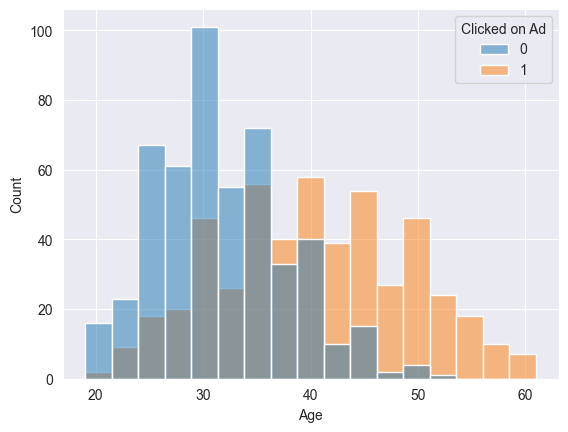

In [11]:
sns.histplot(data=ad_data, x='Age')

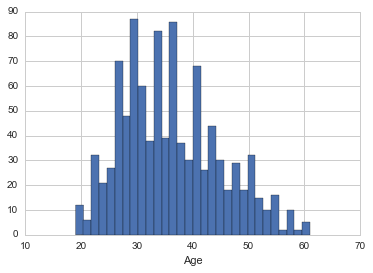

**Create a jointplot showing Area Income versus Age.**

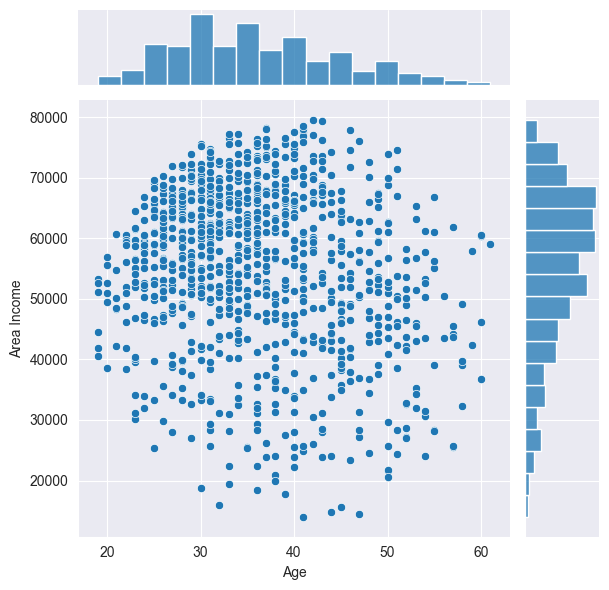

In [10]:
sns.jointplot(data=ad_data, x="Age", y="Area Income")

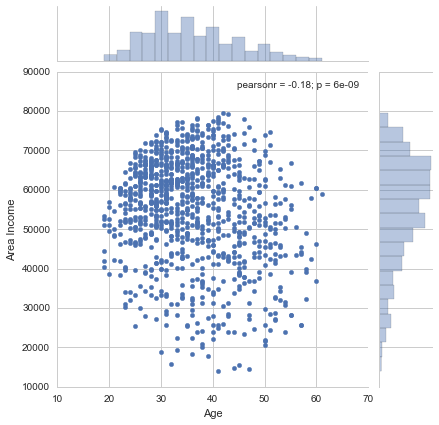

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

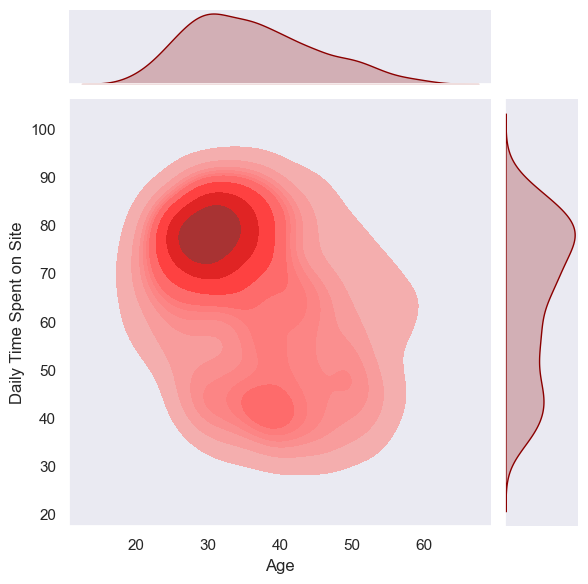

In [30]:
sns.jointplot(data=ad_data, x="Age", y="Daily Time Spent on Site", kind='kde', fill=True, color='darkred')

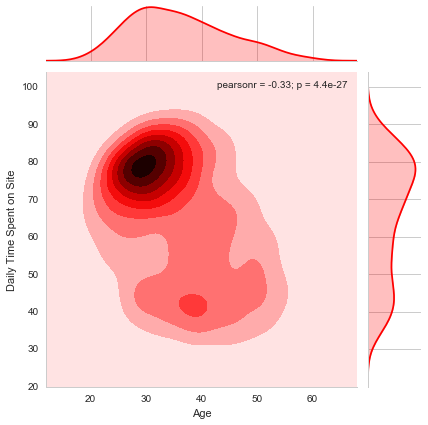

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

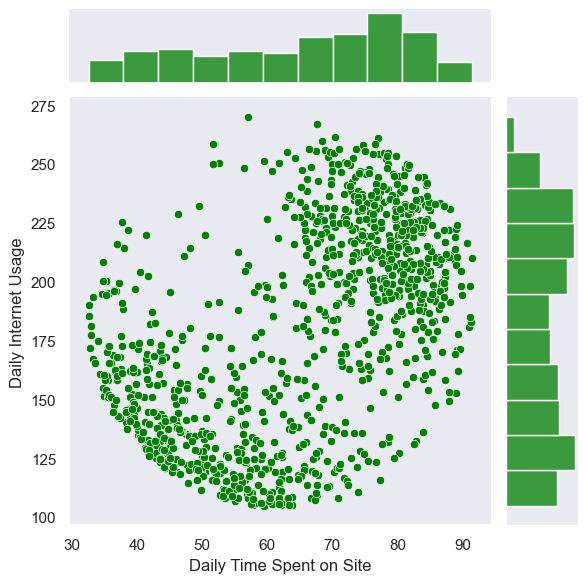

In [33]:
sns.jointplot(data=ad_data, x="Daily Time Spent on Site", y="Daily Internet Usage", color='green')

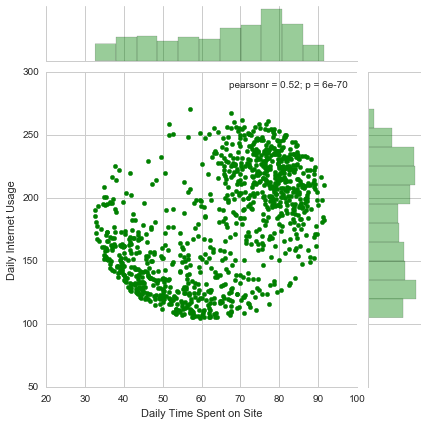

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

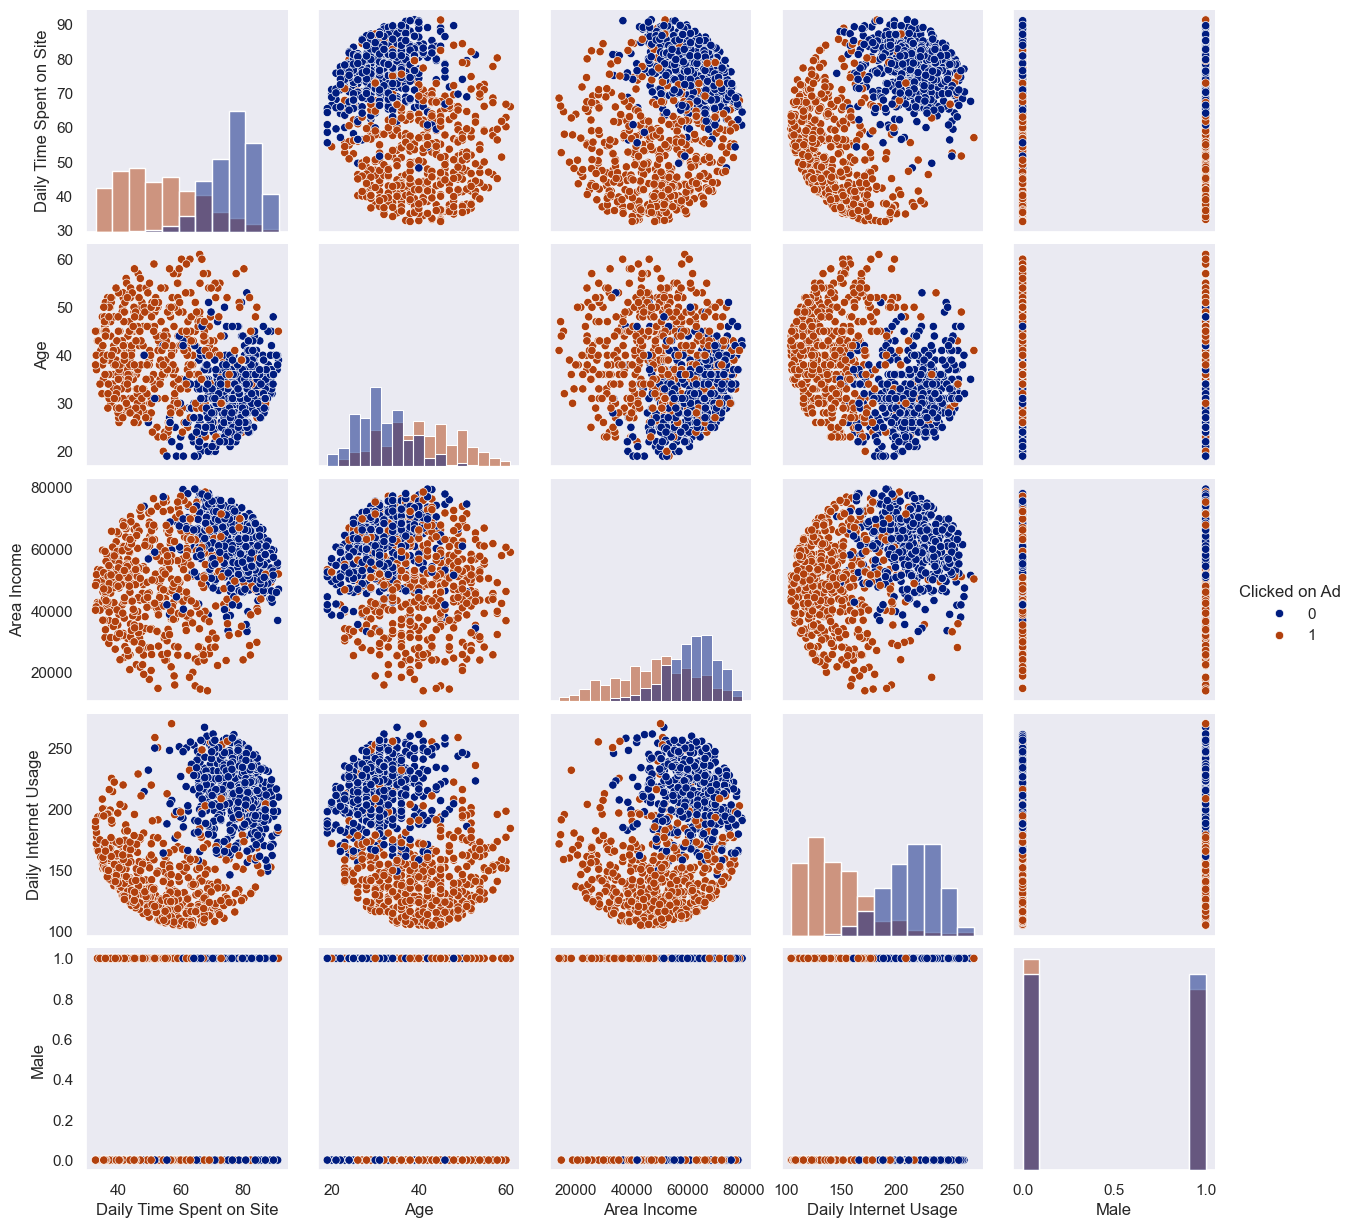

In [36]:
sns.pairplot(data=ad_data, hue='Clicked on Ad', diag_kind='hist')

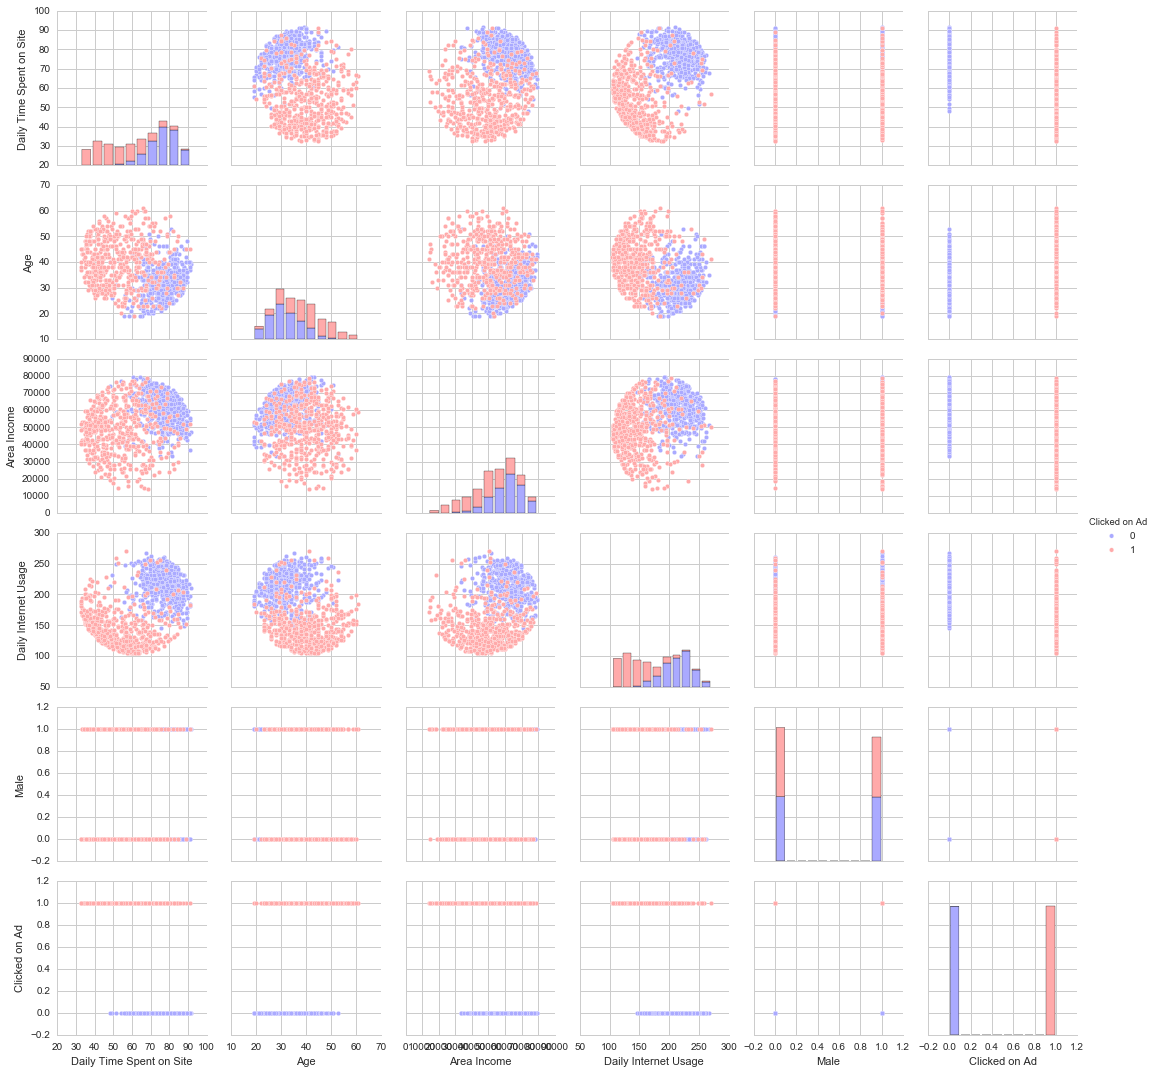

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [ ]:
# Index(['Daily Time Spent on Site', 'Age', 'Area Income',
#        'Daily Internet Usage', 'Male', 'Clicked on Ad'],
#       dtype='object')
# Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_Scaled = X.copy()
X_Scaled[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']] = scale.fit_transform(X[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']])
X_Scaled

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,0
1,0.961132,-0.570425,1.002530,0.313805,1
2,0.282083,-1.139826,0.356949,1.287589,0
3,0.577432,-0.798185,-0.014456,1.501580,1
4,0.212664,-0.114905,1.408868,1.038731,0
...,...,...,...,...,...
995,0.502963,-0.684305,1.222006,0.651314,1
996,-0.864601,1.023896,0.953329,-1.038735,1
997,-0.843775,1.707176,-0.938570,-1.358924,1
998,-0.596389,-1.936986,-0.975484,0.181172,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.20, random_state=42,stratify= y)

** Train and fit a logistic regression model on the training set.**

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.9375  0.96875 0.96875 0.98125 0.96875]
0.9650000000000001


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logistic regression hyperparameters tuning

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [8]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [9]:
from sklearn.model_selection import GridSearchCV 

In [10]:
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)

In [11]:
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.96875
Best Parameters: {'C': 0.23357214690901212, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


## Predictions and Evaluations
** Now predict values for the testing data.**

In [12]:
y_pred = best_clf_lr.predict(X_test)

** Create a Confusion Matrix for the model.**

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_pred,y_test))
confusion_matrix(y_pred,y_test)


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       102
           1       0.97      0.99      0.98        98

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



array([[99,  3],
       [ 1, 97]])

## k-Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.9375  0.9625  0.94375 0.95625 0.96875]
0.95375


In [16]:
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)


In [17]:
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.9600000000000002
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [18]:
y_pred = best_clf_knn.predict(X_test)

In [19]:
print(classification_report(y_pred,y_test))
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       104
           1       0.95      0.99      0.97        96

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



array([[99,  5],
       [ 1, 95]])

## random forest classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.95    0.9875  0.94375 0.9625  0.95625]
0.96


In [25]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [26]:
y_pred = rf.predict(X_test)

In [27]:
print(classification_report(y_pred,y_test))
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       100
           1       0.97      0.97      0.97       100

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



array([[97,  3],
       [ 3, 97]])

## Great Job!